In [8]:
from lol_data import get_summoner_lol_data, get_match_ids, get_match_data, calculate_win_percentage_per_role, calculate_champion_synergy, get_top_champions
from lol_visuals import visualize_win_percentages, plot_win_percentage_over_time, visualize_champion_stats, create_table_visual, visualize_champion_synergy
from config import API_KEY

summoner_name = input("Enter Summoner Name: ")
region = input("Enter Region (e.g., na1, euw1): ")
queue_type = input("Enter Queue Type (e.g., ranked_solo_duo): ")

# ... (bestaande code blijft hetzelfde)
summoner_data = get_summoner_lol_data(API_KEY, summoner_name, region)
match_ids = get_match_ids(API_KEY, summoner_data['puuid'], region, queue_type, count=50)
if summoner_data:
    print(f"Summoner name: {summoner_data['name']}")
    print(f"Summoner Level: {summoner_data['summonerLevel']}")
    print(f"Below is the data analyses for {summoner_name} in {queue_type}:")
    match_ids = get_match_ids(API_KEY, summoner_data['puuid'], region, queue_type)
    if match_ids:
        matches = []
        for match_id in match_ids:
            match_data = get_match_data(API_KEY, match_id, region)
            if match_data:
                matches.append(match_data)
            else:
                print(f"Error fetching match data for match ID {match_id}")


Summoner name: Laarr
Summoner Level: 144
Below is the data analyses for laarr in ranked_solo_duo:


Champion Name: Illaoi, Champion ID: 420
Champion Name: Nocturne, Champion ID: 56
Champion Name: Hwei, Champion ID: 910
Champion Name: Ziggs, Champion ID: 115
Champion Name: Bard, Champion ID: 432
Champion Name: Sion, Champion ID: 14
Champion Name: Zac, Champion ID: 154
Champion Name: Yone, Champion ID: 777
Champion Name: Ashe, Champion ID: 22
Champion Name: Brand, Champion ID: 63
Champion Name: Olaf, Champion ID: 2
Champion Name: Trundle, Champion ID: 48
Champion Name: Katarina, Champion ID: 55
Champion Name: Twitch, Champion ID: 29
Champion Name: FiddleSticks, Champion ID: 9
Champion Name: Camille, Champion ID: 164
Champion Name: Nocturne, Champion ID: 56
Champion Name: Hwei, Champion ID: 910
Champion Name: MissFortune, Champion ID: 21
Champion Name: Brand, Champion ID: 63
Champion Name: Yone, Champion ID: 777
Champion Name: Warwick, Champion ID: 19
Champion Name: Fizz, Champion ID: 105
Champion Name: Jhin, Champion ID: 202
Champion Name: Hwei, Champion ID: 910
Champion Name: Jax, Cha

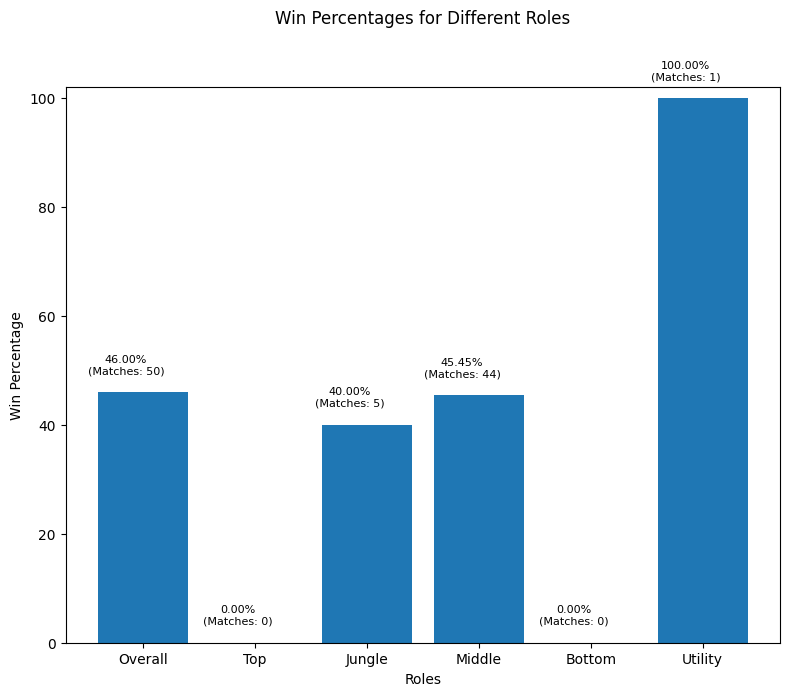

In [9]:
win_percentages = calculate_win_percentage_per_role(matches, summoner_data['puuid'])
visualize_win_percentages(win_percentages)


Total games in the last two weeks for this queue type: 11


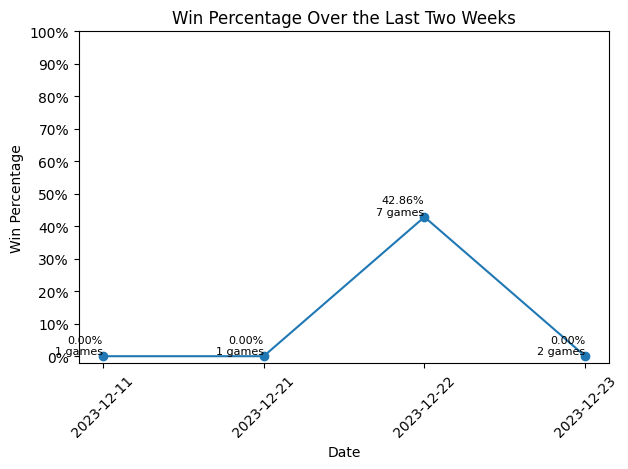

In [10]:
plot_win_percentage_over_time(matches, summoner_data)


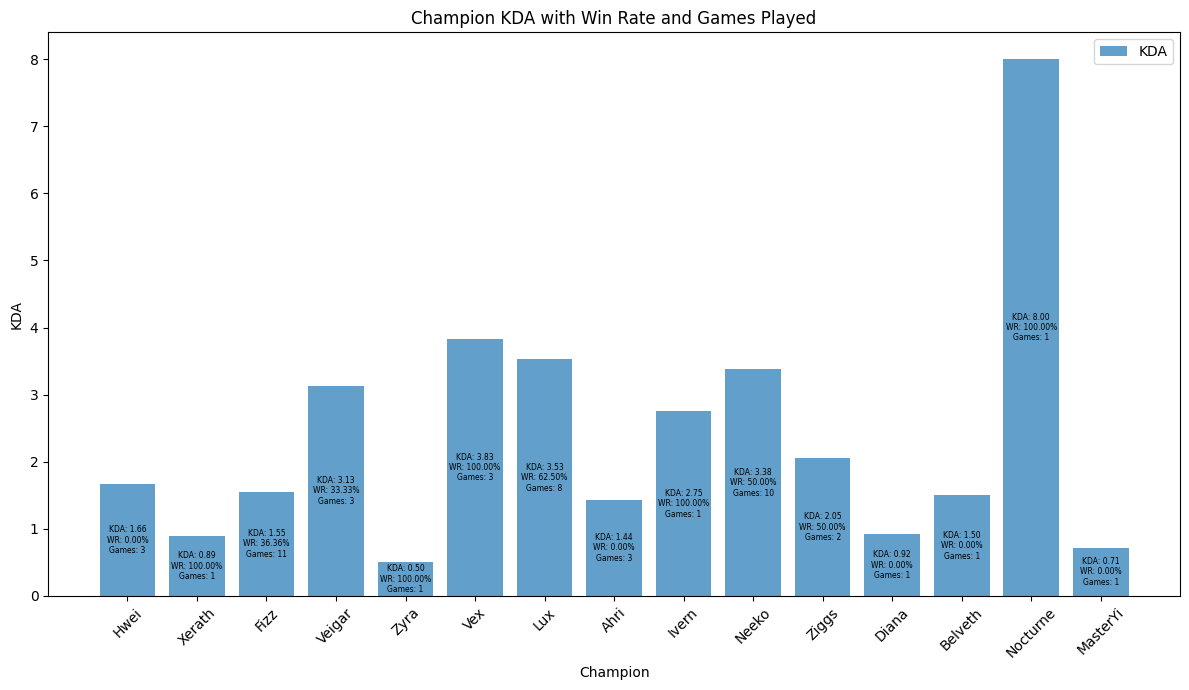

In [11]:
visualize_champion_stats(matches, summoner_data)


In [12]:
create_table_visual(matches, summoner_data['puuid'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


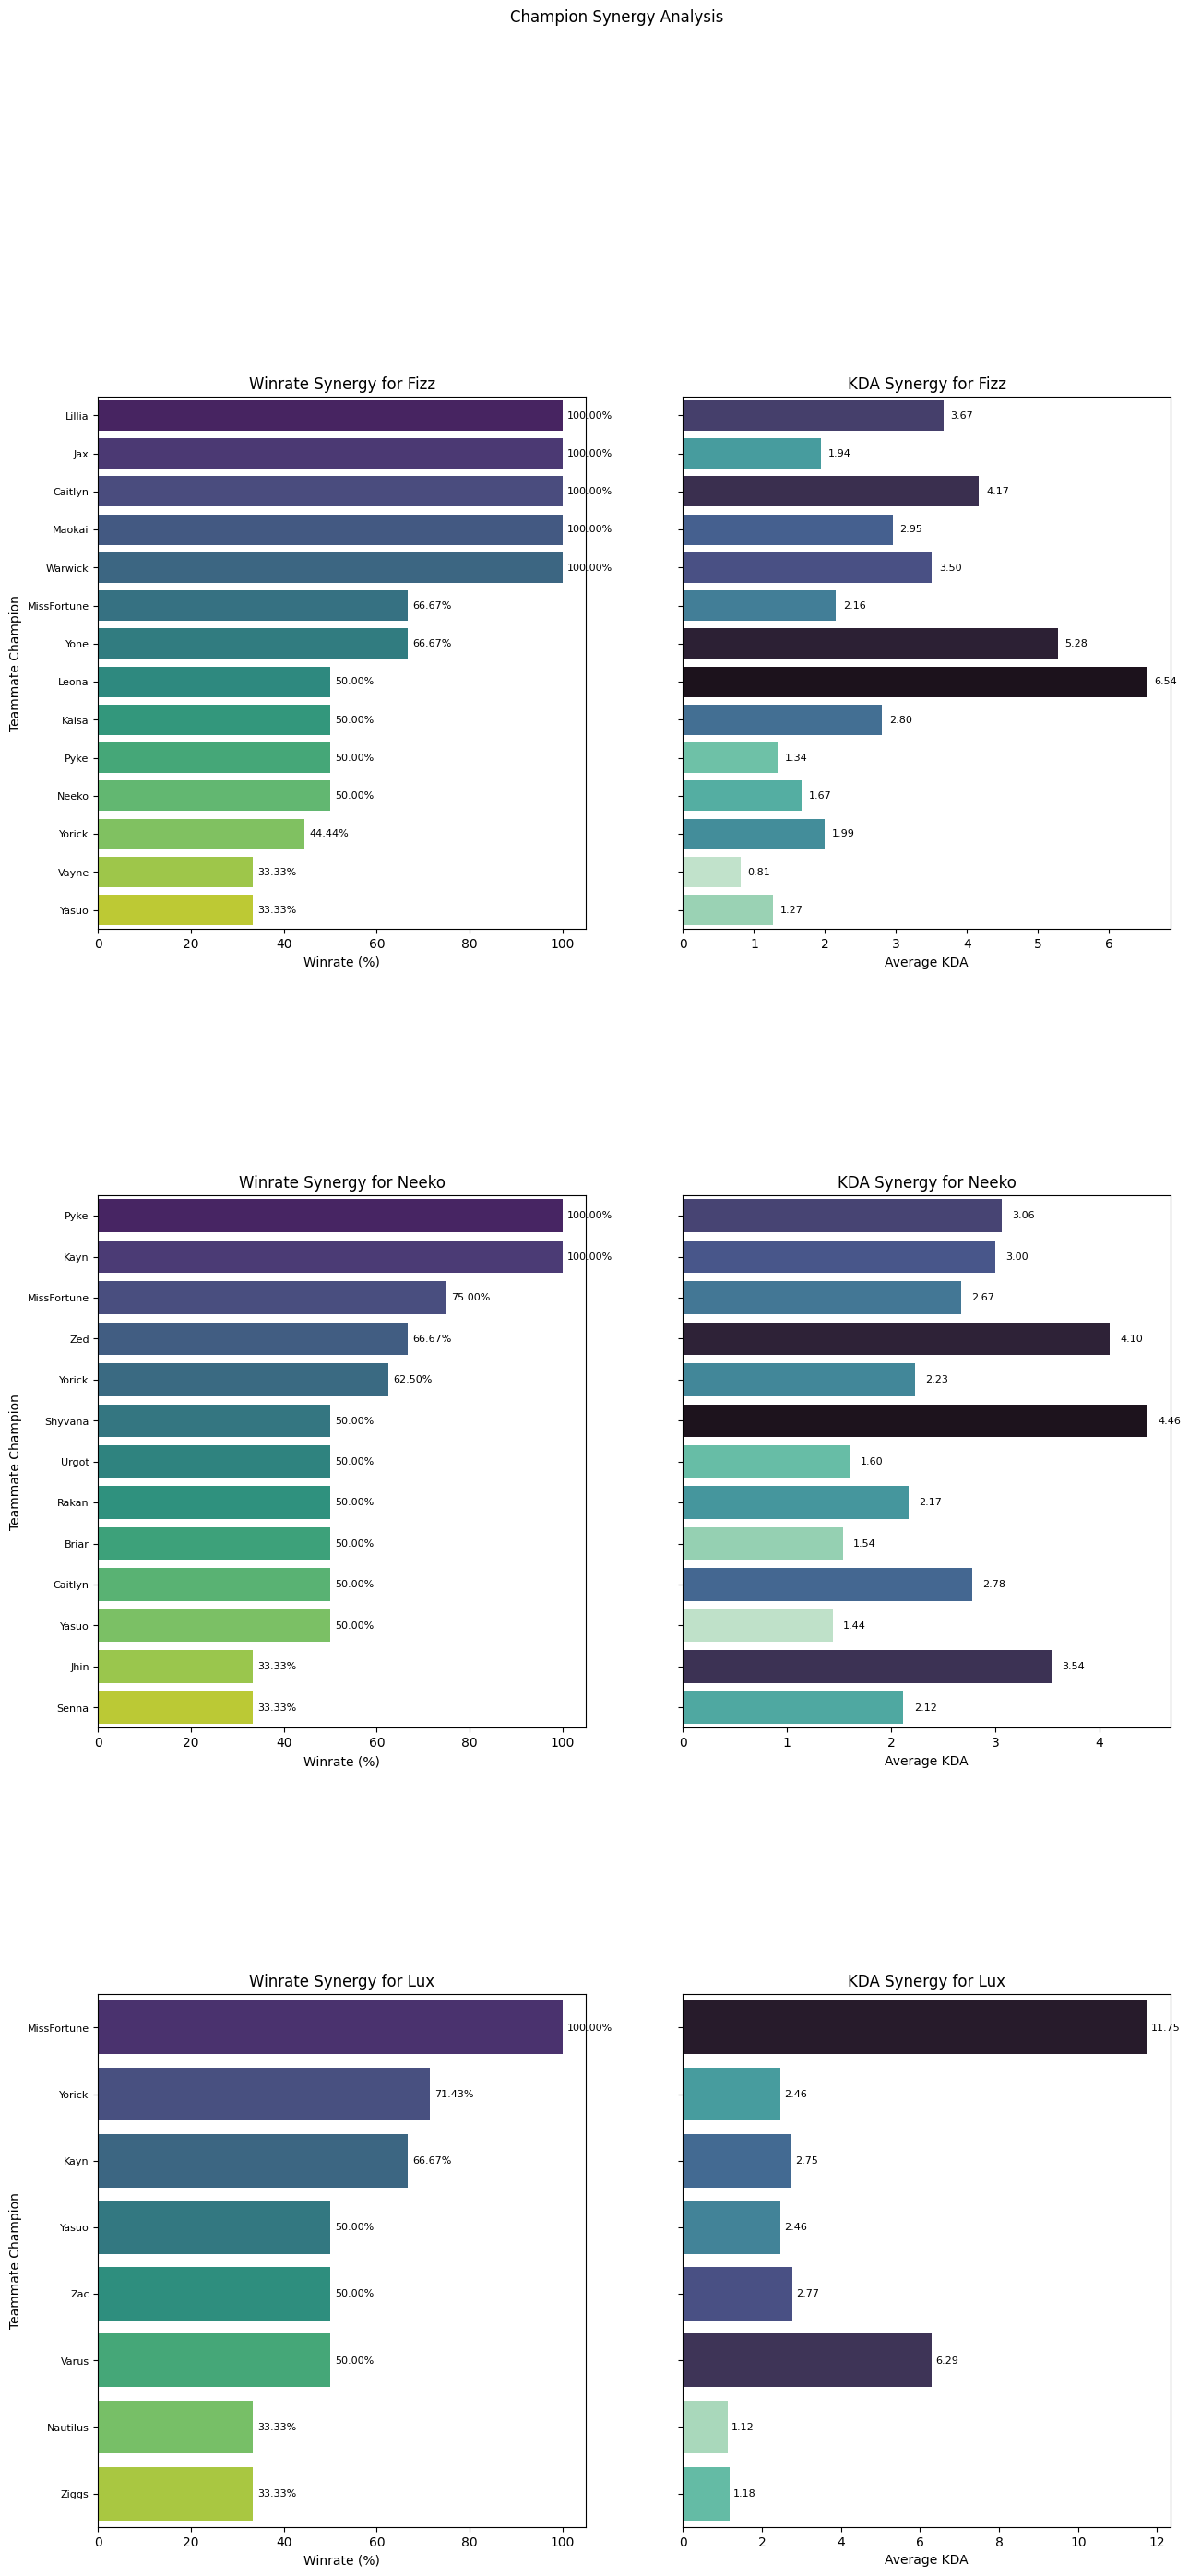

In [13]:
# Determine the user's top 3 champions based on the match history
top_champions = get_top_champions(matches, summoner_data['puuid'], num_top_champions=3)
        # Calculate champion synergy
champion_synergy = calculate_champion_synergy(matches, summoner_data['puuid'], top_champions)
visualize_champion_synergy(champion_synergy, top_champions, min_games_played=2)
